In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from os.path import expanduser as ospath
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture

In [2]:
comparator = ['RR','ss']
def initData():
    df = pd.read_excel(ospath('~/Downloads/Iklim-Bandung.xlsx'))
    cat_cols = ['Tanggal','ff_avg','Tn','Tx', 'ff_x','Month', 'RH_avg','Tavg']
    df = df.drop(cat_cols, axis=1)
    df = df.replace(8888.0, np.nan)
    df = df.replace(9999.0, np.nan)
    imputer = KNNImputer(n_neighbors=100, weights='uniform', metric='nan_euclidean')
    df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    default = df[comparator]
#     month = df['Month']
#     df.drop('Month',axis = 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)
    df_scaled = DataFrame(scaled, columns=df.columns)
    df = df_scaled
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df = df[filtered_entries]
#     df['Month'] = month
    return df, default 

In [3]:
def metricsScoring(dataFrame, prediction):
    silhoutte = silhouette_score(dataFrame, prediction)
    chs = calinski_harabasz_score(dataFrame, prediction)
    dbscoring = davies_bouldin_score(dataFrame, prediction)
    print("Silhoutte : %.4f" %silhoutte)
    print("CHScoring : %.4f" %chs)
    print("DBScoring : %.4f" %dbscoring)

In [4]:
def showScatter(dataFrame, pca):
    sns.scatterplot(x="pca1", y="pca2", hue=dataFrame['cluster'], data=pca)
    plt.title('K-means Clustering with 2 dimensions')
    plt.show(fig)

In [5]:
def showScatterCustom(dataFrame, pca):
    sns.scatterplot(x=comparator[0], y=comparator[1], hue=dataFrame['cluster'], data=dataFrame[comparator])
    plt.title('K-means Clustering with 2 dimensions')
    plt.show()

In [6]:
def showPairPlot(dataFrame):
    plt.figure(figsize=(10, 10))
    sns.pairplot(dataFrame, hue='cluster')
    plt.show()

# Kmeans

In [7]:
df, default = initData()
df.corr()

RR        ss
RR  1.000000 -0.306544
ss -0.306544  1.000000

In [8]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

arrayScore=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i).fit(df).score(df)
    arrayScore.append(kmeans)

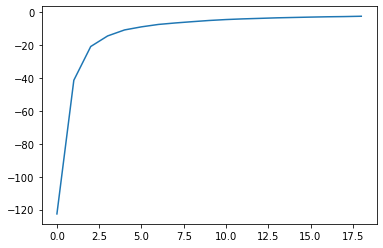

In [9]:
from pandas import DataFrame
import matplotlib.pyplot as plt

plt.plot(arrayScore)

In [10]:
!pip install bayesian-optimization

In [11]:
def objectiveKM(km_n_init, km_max_iter, km_tol,km_n_clusters):
    
    km_n_init = int(np.floor(km_n_init))
    km_max_iter = int(np.floor(km_max_iter))
    km_n_clusters = int(np.floor(km_n_clusters))
        
    kmeans = KMeans(n_clusters=km_n_clusters, init='k-means++', n_init=km_n_init, max_iter=km_max_iter, tol=km_tol, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
    preds = kmeans.fit_predict(df)

    score = silhouette_score(df, preds)

    # karena bayesopt perlu objective yg greater is better
    return score

paramsKM = {
    'km_n_init': (1, 50.),
    'km_max_iter': (1, 500.),
    'km_tol': (0.0001, 1.),
    'km_n_clusters' : (3, 6)
}

In [12]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(objectiveKM, pbounds=paramsKM,random_state = 99)
optimizer.maximize(init_points=50, n_iter=1)

|   iter    |  target   | km_max... | km_n_c... | km_n_init |  km_tol   |
-------------------------------------------------------------------------


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  1        |  0.4741   |  336.5    |  4.464    |  41.45    |  0.03154  |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  2        |  0.474    |  404.2    |  4.697    |  15.58    |  0.04679  |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  3        |  0.5152   |  495.3    |  3.02     |  38.72    |  0.7468   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  4        |  0.4751   |  189.3    |  4.482    |  46.52    |  0.3955   |
|  5        |  0.4553   |  487.0    |  4.573    |  5.587    |  0.8133   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  6        |  0.4713   |  106.6    |  4.663    |  15.32    |  0.8162   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  7        |  0.5177   |  414.2    |  3.665    |  32.6     |  0.09527  |
|  8        |  0.5159   |  206.4    |  3.291    |  8.057    |  0.2123   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  9        |  0.5178   |  238.9    |  3.233    |  12.52    |  0.006652 |
|  10       |  0.4721   |  449.4    |  4.657    |  9.21     |  0.9289   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  11       |  0.5164   |  271.5    |  3.125    |  26.72    |  0.6402   |
|  12       |  0.446    |  400.5    |  5.505    |  13.38    |  0.9683   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  13       |  0.5139   |  233.7    |  3.792    |  27.92    |  0.3774   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  14       |  0.4567   |  102.7    |  5.746    |  47.02    |  0.8375   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  15       |  0.4542   |  217.0    |  5.148    |  42.72    |  0.07914  |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  16       |  0.4494   |  205.6    |  4.925    |  48.85    |  0.7053   |
|  17       |  0.5163   |  318.7    |  3.616    |  15.36    |  0.1601   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  18       |  0.4557   |  152.7    |  5.156    |  47.94    |  0.01588  |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  19       |  0.517    |  157.0    |  3.147    |  43.86    |  0.6938   |
|  20       |  0.4425   |  413.5    |  5.755    |  8.503    |  0.4701   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  21       |  0.4489   |  273.6    |  4.549    |  36.3     |  0.8225   |
|  22       |  0.5164   |  118.4    |  3.317    |  31.08    |  0.2437   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  23       |  0.4699   |  413.6    |  4.397    |  34.86    |  0.3549   |
|  24       |  0.5115   |  52.63    |  3.897    |  8.997    |  0.2329   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  25       |  0.4648   |  272.7    |  4.065    |  37.49    |  0.6482   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  26       |  0.4557   |  385.2    |  5.371    |  26.8     |  0.2564   |
|  27       |  0.5153   |  497.7    |  3.32     |  21.33    |  0.1547   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  28       |  0.4526   |  254.0    |  5.421    |  24.26    |  0.4342   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  29       |  0.5173   |  166.5    |  3.23     |  36.49    |  0.7514   |
|  30       |  0.4448   |  307.9    |  5.707    |  7.524    |  0.2007   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  31       |  0.4541   |  424.3    |  4.983    |  26.31    |  0.7726   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  32       |  0.4666   |  388.4    |  4.665    |  34.79    |  0.2492   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  33       |  0.4518   |  352.0    |  4.198    |  31.28    |  0.6008   |
|  34       |  0.4298   |  305.8    |  5.109    |  4.768    |  0.2119   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  35       |  0.4469   |  149.9    |  5.898    |  33.22    |  0.1742   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  36       |  0.45     |  341.2    |  5.523    |  45.1     |  0.208    |
|  37       |  0.5139   |  473.8    |  3.695    |  8.535    |  0.6308   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  38       |  0.4566   |  19.25    |  5.388    |  7.997    |  0.08658  |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


|  39       |  0.4573   |  409.7    |  5.89     |  38.29    |  0.8195   |
|  40       |  0.4589   |  468.5    |  4.242    |  16.63    |  0.7073   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  41       |  0.4574   |  314.3    |  5.055    |  35.94    |  0.715    |
|  42       |  0.5043   |  111.8    |  3.25     |  25.52    |  0.9401   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  43       |  0.5134   |  367.5    |  3.493    |  4.259    |  0.5831   |
|  44       |  0.4408   |  292.1    |  5.023    |  12.87    |  0.4492   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  45       |  0.5144   |  349.8    |  3.476    |  10.18    |  0.4389   |
|  46       |  0.4346   |  126.0    |  5.758    |  10.31    |  0.3998   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  47       |  0.5167   |  408.9    |  3.115    |  33.74    |  0.01414  |
|  48       |  0.5134   |  464.2    |  3.343    |  8.442    |  0.6087   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  49       |  0.464    |  423.8    |  4.309    |  23.8     |  0.8363   |
|  50       |  0.474    |  255.3    |  4.382    |  15.39    |  0.3625   |


/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in 

|  51       |  0.5172   |  411.5    |  3.0      |  31.08    |  0.0001   |


In [13]:
result = optimizer.max['params']
km_n_init = result['km_n_init']
km_max_iter = result['km_max_iter']
km_tol = result['km_tol']
km_n_clusters = result['km_n_clusters']

km_n_init = int(np.floor(km_n_init))
km_max_iter = int(np.floor(km_max_iter))
km_n_clusters = int(np.floor(km_n_clusters))
        
kmeans = KMeans(n_clusters=km_n_clusters, init='k-means++', n_init=km_n_init, max_iter=km_max_iter, tol=km_tol, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
preds = kmeans.fit_predict(df)
result = KMeans(n_clusters=km_n_clusters).fit(df)

metricsScoring(df, preds)

/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/beniso/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhoutte : 0.5165
CHScoring : 4322.0109
DBScoring : 0.6258


(array([727.,   0.,   0.,   0.,   0., 618.,   0.,   0.,   0., 439.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

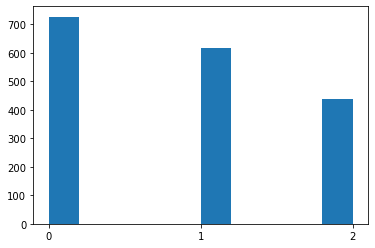

In [14]:
df['cluster'] = result.labels_
plt.xticks(range(0, 4))
plt.hist(df['cluster'])

<Figure size 720x720 with 0 Axes>

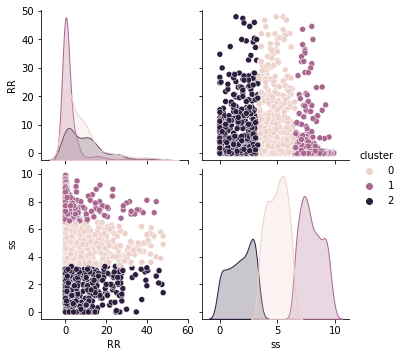

In [15]:
df[comparator] = default
showPairPlot(df)

Maka dari itu dapat disimpulkan hubungan antara Penyinaran sinar matahari dan curah hujan adalah lama penyinaran matahari yang lebih lama mempunya probabilitas curah hujan nya rendah. Sehingga digolongkan 3 kluster bergatung lama penyinarannya. Kluster Pertama yaitu lama penyinaran mata hari sekitar 0 hingga 3 jam. Kluster kedua 3 hingga 6 jam. Kluster terakhir 6 hingga 10 jam. Di kluster terakhir menunjukkan curah hujan yang mayoritas agak rendah, sedangkan dua kluster awal menunjukan currah hujan yang masih bisa relatif tinggi.

In [16]:
df

RR     ss  cluster
0     24.800  0.000        2
1     13.200  3.756        0
2      7.700  3.100        2
3     37.400  6.200        0
4      0.200  1.100        2
...      ...    ...      ...
1822   0.800  3.900        0
1823   0.800  8.300        1
1824  11.968  4.200        0
1825   0.900  2.600        2
1826   7.600  0.200        2

[1784 rows x 3 columns]

# AHC

In [17]:
df,default = initData()
df

RR        ss
0     0.155000  0.000000
1     0.082500  0.379394
2     0.048125  0.313131
3     0.233750  0.626263
4     0.001250  0.111111
...        ...       ...
1822  0.005000  0.393939
1823  0.005000  0.838384
1824  0.074800  0.424242
1825  0.005625  0.262626
1826  0.047500  0.020202

[1784 rows x 2 columns]

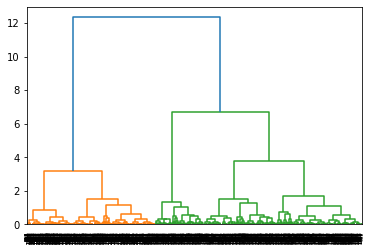

In [18]:
reduced_data = PCA(n_components=2).fit_transform(df)
ahcPCA = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(ahcPCA, method = 'ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering as AHC

for i in range(2,10):
    ahc = AHC(n_clusters=i, affinity='euclidean', linkage='ward')
    y_pred =ahc.fit_predict(df)
    print(metricsScoring(df, y_pred))


Silhoutte : 0.5174
CHScoring : 2931.2277
DBScoring : 0.6083
None
Silhoutte : 0.4993
CHScoring : 3699.2615
DBScoring : 0.5945
None
Silhoutte : 0.4445
CHScoring : 3784.0527
DBScoring : 0.7316
None
Silhoutte : 0.4393
CHScoring : 4299.1141
DBScoring : 0.7133
None
Silhoutte : 0.4441
CHScoring : 3988.8203
DBScoring : 0.7542
None
Silhoutte : 0.4115
CHScoring : 3785.2805
DBScoring : 0.7905
None
Silhoutte : 0.3756
CHScoring : 3753.3602
DBScoring : 0.8602
None
Silhoutte : 0.3603
CHScoring : 3737.3824
DBScoring : 0.8830
None


In [20]:
from sklearn.cluster import AgglomerativeClustering as AHC

ahc = AHC(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred =ahc.fit_predict(df)
label = ahc.fit(df)
df['cluster'] = label.labels_

metricsScoring(df, preds)

Silhoutte : 0.5258
CHScoring : 891.5704
DBScoring : 1.4580


<Figure size 720x720 with 0 Axes>

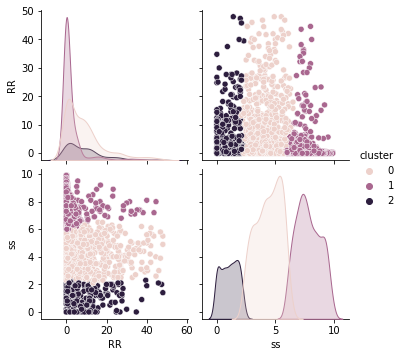

In [21]:
df[comparator] = default
showPairPlot(df)

(array([843.,   0.,   0.,   0.,   0., 682.,   0.,   0.,   0., 259.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

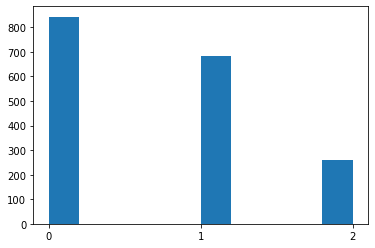

In [22]:

plt.xticks(range(0, 4))
plt.hist(df['cluster'])

## Gaussian Mixture

In [23]:
df, default = initData()
print(df)

            RR        ss
0     0.155000  0.000000
1     0.082500  0.379394
2     0.048125  0.313131
3     0.233750  0.626263
4     0.001250  0.111111
...        ...       ...
1822  0.005000  0.393939
1823  0.005000  0.838384
1824  0.074800  0.424242
1825  0.005625  0.262626
1826  0.047500  0.020202

[1784 rows x 2 columns]


In [24]:
gm = GaussianMixture(n_components = 3)

pred = gm.fit(df).predict(df)
df['cluster'] = pred

In [25]:
metricsScoring(df, pred)

Silhoutte : 0.7506
CHScoring : 8398.2788
DBScoring : 0.3732


In [26]:
df[comparator] = default
df

RR     ss  cluster
0     24.800  0.000        2
1     13.200  3.756        1
2      7.700  3.100        1
3     37.400  6.200        2
4      0.200  1.100        0
...      ...    ...      ...
1822   0.800  3.900        1
1823   0.800  8.300        1
1824  11.968  4.200        1
1825   0.900  2.600        1
1826   7.600  0.200        1

[1784 rows x 3 columns]

<Figure size 720x720 with 0 Axes>

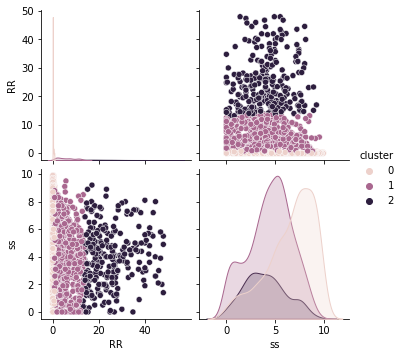

In [27]:
showPairPlot(df)

(array([727.,   0.,   0.,   0.,   0., 618.,   0.,   0.,   0., 439.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

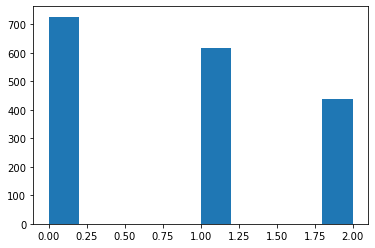

In [28]:
df['cluster'] = result.labels_
plt.hist(df['cluster'])

## MeanShift

In [29]:
df, default = initData()
df

RR        ss
0     0.155000  0.000000
1     0.082500  0.379394
2     0.048125  0.313131
3     0.233750  0.626263
4     0.001250  0.111111
...        ...       ...
1822  0.005000  0.393939
1823  0.005000  0.838384
1824  0.074800  0.424242
1825  0.005625  0.262626
1826  0.047500  0.020202

[1784 rows x 2 columns]

In [30]:
bandwidth = estimate_bandwidth(df.to_numpy(), quantile=0.1283, n_samples=414)
ms = MeanShift(bandwidth=bandwidth)
preds = ms.fit_predict(df)

getLabel = ms.fit(df).labels_
set(getLabel)
df['cluster'] = getLabel

metricsScoring(df, preds)

Silhoutte : 0.8970
CHScoring : 84377.8238
DBScoring : 0.1511


(array([701., 294.,   0., 315.,   0., 213., 226.,   0.,  25.,  10.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

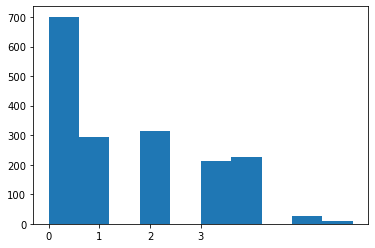

In [31]:
result = ms.fit(df)
df['cluster'] = result.labels_
plt.xticks(range(0, 4))
plt.hist(df['cluster'])

<Figure size 720x720 with 0 Axes>

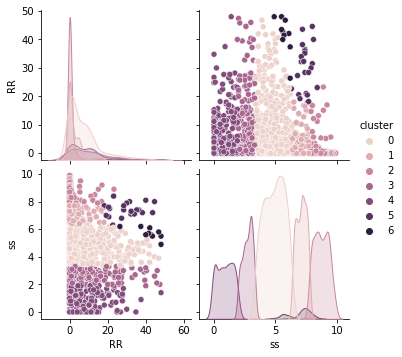

In [32]:
df[comparator] = default
showPairPlot(df)